In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

### The image size after convolution 
### $ L{'} = \frac{L+2*p-w}{s}+1 $
* L: The size of origin image
* L': The size of new image
* p: The size of padding
* w: The size of conv model
* s: The size of stride

(1, 3, 3, 1)


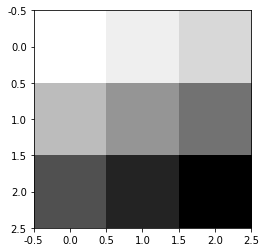

In [8]:
sess = tf.Session()
image = np.array([[[[1],[2],[3]],
                 [[4],[5],[6]],
                  [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')

### Image: 1,3,3,1; Filter: 2,2,1,1; Stride:1\*1; Padding: VALID 

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


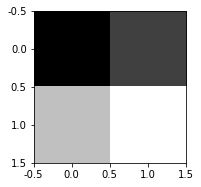

In [22]:
print('image.shape', image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                    [[[1.]],[[1.]]]])
print('weight.shape', weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='VALID')
with tf.Session() as sess:
    conv2d_img = conv2d.eval()
print('conv2d_img.shape', conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

### Image: 1,3,3,1; Filter: 2,2,1,1; Stride:1\*1; Padding: SAME

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


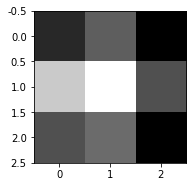

In [24]:
print('image.shape', image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                    [[[1.]],[[1.]]]])
print('weight.shape', weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME')
with tf.Session() as sess:
    conv2d_img = conv2d.eval()
print('conv2d_img.shape', conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


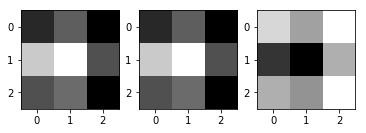

In [29]:
print('image.shape', image.shape)
weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],[[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print('weight.shape', weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME')
with tf.Session() as sess:
    conv2d_img = conv2d.eval()
print('conv2d_img.shape', conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

### Max Pooling

pool.shape (1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


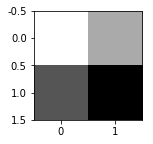

In [53]:
image = np.array([[[[4],[3]],[[2],[1]]]], dtype=np.float32)
kernel = [1,2,2,1]
pool = tf.nn.max_pool(image, ksize=kernel, strides=[1,1,1,1], padding='SAME')
print('pool.shape', pool.shape)

with tf.Session() as sess:
    pool_img = pool.eval()
    print(pool_img)

# pool_img = np.swapaxes(pool_img, 0, 3)
plt.figure(figsize=(2,2))
plt.imshow(pool_img.reshape(2,2), cmap='gray')


### Average Pooling

pool.shape (1, 2, 2, 1)
[[[[2.5]
   [2. ]]

  [[1.5]
   [1. ]]]]


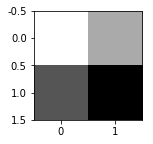

In [54]:
image = np.array([[[[4],[3]],[[2],[1]]]], dtype=np.float32)
kernel = [1,2,2,1]
pool = tf.nn.avg_pool(image, ksize=kernel, strides=[1,1,1,1], padding='SAME')
print('pool.shape', pool.shape)

with tf.Session() as sess:
    pool_img = pool.eval()
    print(pool_img)

plt.figure(figsize=(2,2))
plt.imshow(pool_img.reshape(2,2), cmap='gray')

### MNIST images loading

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./MNIST_data/', one_hot=True)

Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz


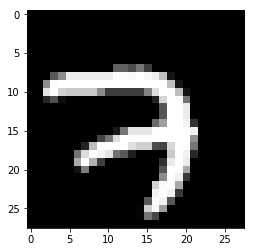

In [65]:
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap='gray')

### MNIST Convolution layer

Tensor("Conv2D_15:0", shape=(1, 14, 14, 5), dtype=float32)


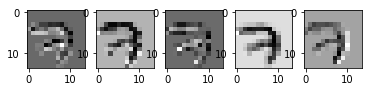

In [67]:
sess = tf.InteractiveSession()

img = img.reshape(-1,28,28,1)
W1 = tf.Variable(tf.random_normal([3,3,1,5], stddev=0.01))
conv2d = tf.nn.conv2d(img, W1, strides=[1,2,2,1], padding='SAME')
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

### MNIST Max pooling

Tensor("MaxPool_13:0", shape=(1, 7, 7, 5), dtype=float32)


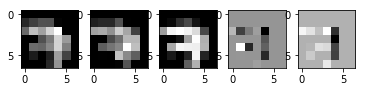

In [68]:
pool = tf.nn.max_pool(conv2d, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7,7), cmap='gray')

## CNN for MNIST

### Conv layer 1

In [71]:
# input placeholders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1,28,28,1])
Y = tf.placeholder(tf.float32, [None, 10])

# L1 ImgIn shape=(?,28,28,1)
W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev=0.01))
# Conv --> (?,28,28,32)
# Pool --> (?,14,14,32)
L1 = tf.nn.conv2d(X_img, W1, strides=[1,1,1,1], padding='SAME')
print(L1)
L1 = tf.nn.relu(L1)
print(L1)
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
print(L1)

Tensor("Conv2D_17:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu_1:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool_15:0", shape=(?, 14, 14, 32), dtype=float32)


### Conv layer 2

In [90]:
# L2 ImgIn shape=(?,14,14,32)
W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev=0.01))
# Conv --> (?,14,14,64)
# Pool --> (?,7,7,64)
L2 = tf.nn.conv2d(L1, W2, strides=[1,1,1,1], padding='SAME')
print(L2)
L2 = tf.nn.relu(L2)
print(L2)
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
print(L2)

# L2 = tf.reshape(L2, [-1,7*7*64])
# print(L2)

Tensor("Conv2D_21:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_3:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_17:0", shape=(?, 7, 7, 64), dtype=float32)


### Conv layer 3

In [95]:
# L3 ImgIn shape=(?,7,7,64)
W3 = tf.Variable(tf.random_normal([3,3,64,128], stddev=0.01))
# Conv --> (?,7,7,128)
# Pool --> (?,4,4,128)
# Reshape --> (?,4*4*128)  flatten for FC
L3 = tf.nn.conv2d(L2, W3, strides=[1,1,1,1], padding='SAME')
print(L3)
L3 = tf.nn.relu(L3)
print(L3)
L3 = tf.nn.max_pool(L3, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
print(L3)
L3 = tf.reshape(L3, [-1,4*4*128])
print(L3)

Tensor("Conv2D_24:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("Relu_5:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("MaxPool_19:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("Reshape_5:0", shape=(?, 2048), dtype=float32)


### Fully connected layer (FC, Dense)

In [101]:
# L4 FC 4*4*128 inputs --> 625 outputs
W4 = tf.get_variable('W_4', shape=[4*4*128,625], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3,W4)+b4)

# L5 Final FC 625 inputs --> 10 outputs
W5 = tf.get_variable('W_5', shape=[625,10], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L4,W5)+b5

# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# define cost/loss & optimizer 
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

### Training model

In [103]:
%%time
# intializer
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples/batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c/total_batch
    print('Epochs:', '%04d'%(epoch+1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

Learning started. It takes sometime.
Epochs: 0001 cost = 0.327048515
Epochs: 0002 cost = 0.053233697
Epochs: 0003 cost = 0.036000588
Epochs: 0004 cost = 0.027334630
Epochs: 0005 cost = 0.020531042
Epochs: 0006 cost = 0.018678214
Epochs: 0007 cost = 0.014920640
Epochs: 0008 cost = 0.012513410
Epochs: 0009 cost = 0.010326395
Epochs: 0010 cost = 0.010151759
Epochs: 0011 cost = 0.009306932
Epochs: 0012 cost = 0.007151915
Epochs: 0013 cost = 0.005731108
Epochs: 0014 cost = 0.007760793
Epochs: 0015 cost = 0.007760925
Learning Finished!
Wall time: 29min 46s


### Test model & Evaluation

In [104]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))

Accuracy: 0.9908


## Class, Layers, Ensemble

### Class

In [86]:
class Model:
    
    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()
        
    def _build_net(self):
        with tf.variable_scope(self.name):
            # input placeholders
            self.X = tf.placeholder(tf.float32, [None,784])
            # img 28*28*1
            X_img = tf.reshape(self.X, [-1,28,28,1])
            self.Y = tf.placeholder(tf.float32, [None,10])
            
            # L1 ImgIn shape=(?,28,28,1)
            W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev=0.01))
            
    def predict(self, x_test, keep_prob=1.0):
        return self.sess.run(self.logits, feed_dict={self.X:x_test, self.keep_prob: keep_prob})
    
    def get_accuracy(self, x_test, y_test, keep_prob=1.0):
        return self.sess.run(self.accuracy, feed_dict={self.X:x_text, self.Y:y_test, self.keep_prob:keep_prob})
    
    def train(self, x_data, y_data, keep_prob=1.0):
        return self.sess.run([self.cost, self.optimizer], feed_dict={self.X:x_data, self.Y:y_data, self.keep_prob:keep_prob})

### tf.layers
* average_pooling1d()
* average_pooling2d()
* average_pooling3d()
* batch_normalization()
* conv1d()
* conv2d()
* conv2d_transpose()
* conv3d()
* dense()
* dropout()
* max_pooling1d()
* max_pooling2d()
* max_pooling3d()
* separable_conv2d()

In [ ]:
# Convolution Layer #1
conv1 = tf.layers.conv2d(inputs=X_img, filters=32, kernel_size=[3,3], padding='SAME', activation=tf.nn.relu)
pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2,2], padding='SAME', strides=2)
dropout1 = tf.layers.dropout(inputs=pool1, rate=0.7, training=self.training)

# Convolution Layer #2
conv2 = tf.layers.conv2d(inputs=dropout1, filters=64, kernel_size=[3,3], padding='SAME', activation=tf.nn.relu)
pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2,2], padding='SAME', strides=2)
dropout2 = tf.layers.dropout(inputs=pool2, rate=0.7, training=self.training)

# Convolution Layer #3
conv3 = tf.layers.conv2d(inputs=dropout2, filters=128, kernel_size=[3,3], padding='SAME', activation=tf.nn.relu)
pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2,2], padding='SAME', strides=2)
dropout3 = tf.layers.dropout(inputs=pool3, rate=0.7, training=self.training)

# FC Layer
flat = tf.reshape(dropout3, [-1, 4*4*128])
dense4 = tf.layers.dense(inputs=flag, units=625, activation=tf.nn.relu)
dropout4 = tf.layers.dropout(inputs=dense4, rate=0.5, training=self.training)

### Ensemble

In [4]:
%%time

# hyper parameters
learning_rate = 0.001
training_epochs = 20
batch_size = 100


class Model:

    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            # dropout (keep_prob) rate  0.7~0.5 on training, but should be 1
            # for testing
            self.training = tf.placeholder(tf.bool)

            # input place holders
            self.X = tf.placeholder(tf.float32, [None, 784])

            # img 28x28x1 (black/white), Input Layer
            X_img = tf.reshape(self.X, [-1, 28, 28, 1])
            self.Y = tf.placeholder(tf.float32, [None, 10])

            # Convolutional Layer #1
            conv1 = tf.layers.conv2d(inputs=X_img, filters=32, kernel_size=[3, 3], padding="SAME", activation=tf.nn.relu)
            # Pooling Layer #1
            pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2],
                                            padding="SAME", strides=2)
            dropout1 = tf.layers.dropout(inputs=pool1, rate=0.3, training=self.training)

            # Convolutional Layer #2 and Pooling Layer #2
            conv2 = tf.layers.conv2d(inputs=dropout1, filters=64, kernel_size=[3, 3], padding="SAME", activation=tf.nn.relu)
            pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], padding="SAME", strides=2)
            dropout2 = tf.layers.dropout(inputs=pool2,
                                         rate=0.3, training=self.training)

            # Convolutional Layer #3 and Pooling Layer #3
            conv3 = tf.layers.conv2d(inputs=dropout2, filters=128, kernel_size=[3, 3], padding="SAME", activation=tf.nn.relu)
            pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2], padding="SAME", strides=2)
            dropout3 = tf.layers.dropout(inputs=pool3, rate=0.3, training=self.training)

            # Dense Layer with Relu
            flat = tf.reshape(dropout3, [-1, 128 * 4 * 4])
            dense4 = tf.layers.dense(inputs=flat, units=625, activation=tf.nn.relu)
            dropout4 = tf.layers.dropout(inputs=dense4, rate=0.5, training=self.training)

            # Logits (no activation) Layer: L5 Final FC 625 inputs -> 10 outputs
            self.logits = tf.layers.dense(inputs=dropout4, units=10)

        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test, training=False):
        return self.sess.run(self.logits, feed_dict={self.X: x_test, self.training: training})

    def get_accuracy(self, x_test, y_test, training=False):
        return self.sess.run(self.accuracy, feed_dict={self.X: x_test, self.Y: y_test, self.training: training})

    def train(self, x_data, y_data, training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={self.X: x_data, self.Y: y_data, self.training: training})

# initialize
sess = tf.Session()

models = []
num_models = 2
for m in range(num_models):
    models.append(Model(sess, "model" + str(m)))

sess.run(tf.global_variables_initializer())

print('Learning Started!')

# train my model
for epoch in range(training_epochs):
    avg_cost_list = np.zeros(len(models))
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        # train each model
        for m_idx, m in enumerate(models):
            c, _ = m.train(batch_xs, batch_ys)
            avg_cost_list[m_idx] += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', avg_cost_list)

print('Learning Finished!')

# Test model and check accuracy
test_size = len(mnist.test.labels)
predictions = np.zeros([test_size, 10])
for m_idx, m in enumerate(models):
    print(m_idx, 'Accuracy:', m.get_accuracy(
        mnist.test.images, mnist.test.labels))
    p = m.predict(mnist.test.images)
    predictions += p

ensemble_correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(mnist.test.labels, 1))
ensemble_accuracy = tf.reduce_mean(tf.cast(ensemble_correct_prediction, tf.float32))
print('Ensemble accuracy:', sess.run(ensemble_accuracy))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

Learning Started!
Epoch: 0001 cost = [0.29532958 0.2913506 ]
Epoch: 0002 cost = [0.08581066 0.08729551]
Epoch: 0003 cost = [0.06535443 0.0662828 ]
Epoch: 0004 cost = [0.05446313 0.05481263]
Epoch: 0005 cost = [0.04797759 0.04899546]
Epoch: 0006 cost = [0.04232745 0.04476602]
Epoch: 0007 cost = [0.03913396 0.04117978]
Epoch: 0008 cost = [0.03794655 0.03613744]
Epoch: 0009 cost = [0.03346853 0.03463453]
Epoch: 0010 cost = [0.03308519 0.03269087]
Epoch: 0011 cost = [0.03009275 0.03277793]
Epoch: 0012 cost = [0.02977828 0.02969906]
Epoch: 0013 cost = [0.02755572 0.02915724]
Epoch: 0014 cost = [0.02800386 0.02719267]
Epoch: 0015 cost = [0.02619928 0.02717582]
Epoch: 0016 cost = [0.02503444 0.02435563]
Epoch: 0017 cost = [0.02287573 0.02539053]
Epoch: 0018 cost = [0.02242092 0.02426046]
Epoch: 0019 cost = 